In [15]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.metrics import accuracy
import tensorflow as tf



In [2]:
df_Plant1_Generation = pd.read_csv("Plant_1_Generation_Data.csv", sep = ",",  low_memory = False , encoding = 'utf_8')
df_Plant2_Generation = pd.read_csv("Plant_2_Generation_Data.csv", sep = ",",  low_memory = False , encoding = 'utf_8')
df_Plant1_Weather = pd.read_csv("Plant_1_Weather_Sensor_Data.csv", sep = ",",  low_memory = False , encoding = 'utf_8')
df_Plant2_Weather = pd.read_csv("Plant_2_Weather_Sensor_Data.csv", sep = ",",  low_memory = False , encoding = 'utf_8')

In [3]:
df_Plant1_Generation.drop(['SOURCE_KEY','PLANT_ID'],axis = 1 , inplace = True)
df_Plant2_Generation.drop(['SOURCE_KEY','PLANT_ID'],axis = 1 , inplace = True)
df_Plant1_Weather.drop(['SOURCE_KEY','PLANT_ID'],axis = 1 , inplace = True)
df_Plant2_Weather.drop(['SOURCE_KEY','PLANT_ID'],axis = 1 , inplace = True)

In [4]:
#Formato de fecha
df_Plant1_Generation['DATE_TIME']= pd.to_datetime(df_Plant1_Generation['DATE_TIME'])
df_Plant1_Weather['DATE_TIME']= pd.to_datetime(df_Plant1_Weather['DATE_TIME'])
df_Plant2_Generation['DATE_TIME']= pd.to_datetime(df_Plant2_Generation['DATE_TIME'])
df_Plant2_Weather['DATE_TIME']= pd.to_datetime(df_Plant2_Weather['DATE_TIME'])

In [5]:
#Se unen los datasets de las 2 plantas
plant1 = pd.merge(df_Plant1_Generation, df_Plant1_Weather, how='inner', on = 'DATE_TIME')
plant2 = pd.merge(df_Plant2_Generation, df_Plant2_Weather, how='inner', on = 'DATE_TIME')

In [6]:
df_generation = pd.concat([plant1,plant2], axis= 0)

In [7]:
X = df_generation[['DATE_TIME','DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','IRRADIATION']].copy()
Y_AC = df_generation['AC_POWER'].copy()

In [8]:
Y_AC = np.array(Y_AC)

In [9]:
X = np.array(X)

In [28]:
X[:,0]

array([Timestamp('2020-05-15 00:00:00'), Timestamp('2020-05-15 00:00:00'),
       Timestamp('2020-05-15 00:00:00'), ...,
       Timestamp('2020-06-17 23:45:00'), Timestamp('2020-06-17 23:45:00'),
       Timestamp('2020-06-17 23:45:00')], dtype=object)

In [10]:
X = X.reshape(np.size(X,0),5)

In [11]:
Y_AC = Y_AC.reshape(np.size(X,0),1) #Dolor

In [12]:
cap1 = range(1, 5, 1)
cap2 = range(0, 5, 1)
total_iter = []

In [13]:
scaler = StandardScaler()

In [16]:
for i in cap1:
   for k in cap2:

      model = Sequential()
      model.add(Dense(i,input_shape = [4], activation= 'relu',kernel_initializer='normal'))
      if k != 0:
         model.add(Dense(k,activation='relu',kernel_initializer='normal'))
      model.add(Dense(1))

      Errores = np.ones(5)
      j = 0
      kf = KFold(n_splits=5, shuffle = True)

      for train_index, test_index in kf.split(X):
          X_train, X_test = X[train_index], X[test_index]
          y_train, y_test = Y_AC[train_index], Y_AC[test_index]
          data_time_test = X_test[:,0]
          X_train = np.delete(X_train,0,axis=1)
          X_test = np.delete(X_test,0,axis=1)
    
          X_train_n = scaler.fit_transform(X_train)
          X_test_n  = scaler.fit_transform(X_test)
    

          model.compile(loss='mean_absolute_error',
                        optimizer= 'RMSprop' ,
                   metrics=['mean_squared_error'])
    
          model.fit(X_train_n,y_train, epochs= 20, validation_split=0.1)
          y_pred_ac = model.predict(X_test_n)

          Errores[j] = mean_squared_error(y_test,y_pred_ac)
          j+=1
      iter = [i , k ,math.sqrt(np.mean(Errores))]
      total_iter.append(iter)

#print("\nError de validación: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

Epoch 1/20
2551/2551 [==============================] - 7s 3ms/step - loss: 277.1014 - mean_squared_error: 225968.7344 - val_loss: 201.2183 - val_mean_squared_error: 125302.0938
Epoch 2/20
2551/2551 [==============================] - 6s 2ms/step - loss: 276.4244 - mean_squared_error: 224979.4375 - val_loss: 200.6122 - val_mean_squared_error: 124610.0000
Epoch 3/20
2551/2551 [==============================] - 4s 2ms/step - loss: 275.7419 - mean_squared_error: 223995.8438 - val_loss: 199.9940 - val_mean_squared_error: 123913.5078
Epoch 4/20
2551/2551 [==============================] - 4s 1ms/step - loss: 275.0580 - mean_squared_error: 223021.1875 - val_loss: 199.3738 - val_mean_squared_error: 123221.8359
Epoch 5/20
2551/2551 [==============================] - 4s 1ms/step - loss: 274.3714 - mean_squared_error: 222051.2344 - val_loss: 198.7455 - val_mean_squared_error: 122531.5000
Epoch 6/20
2551/2551 [==============================] - 4s 1ms/step - loss: 273.6786 - mean_squared_error: 221

KeyboardInterrupt: ignored

In [17]:
total_iter

[[1, 0, 405.48627223854606],
 [1, 1, 464.8211042430111],
 [1, 2, 405.4975705042472],
 [1, 3, 405.8112298013156],
 [1, 4, 201.18440424296293],
 [2, 0, 207.44351631590854],
 [2, 1, 464.88064812708524],
 [2, 2, 169.36669151638378],
 [2, 3, 207.43495570073284],
 [2, 4, 407.5695627812735],
 [3, 0, 207.18632640091744]]

In [47]:
data_time_test.shape

(11337, 1)

In [83]:
data_time_test = data_time_test.reshape(data_time_test.shape[0],1)

In [84]:
data_time_test[0].shape

(1,)

In [79]:
data_time_test.shape

(11337, 1)

In [35]:
y_test.shape

(11337, 1)

In [36]:
y_pred_ac.shape

(11337, 1)

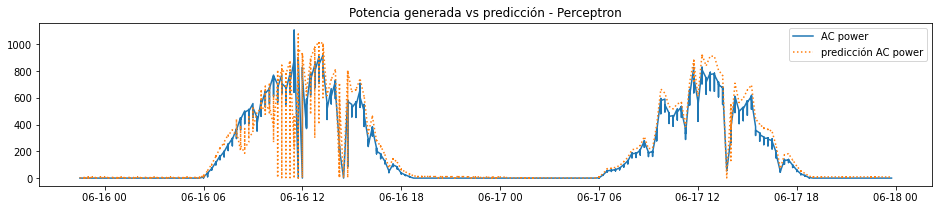

In [88]:
plt.figure(figsize=(16,3))
plt.plot(data_time_test[7000:11337],y_test[7000:11337],label='AC power')
plt.plot(data_time_test[7000:11337],y_pred_ac[7000:11337],label="predicción AC power", linestyle = ':')
plt.legend(loc='best')
plt.title("Potencia generada vs predicción - Perceptron")
plt.show()